In [1]:
import os
from termcolor import colored

import h5py 
from IPython.display import HTML
import imageio
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
dataset_path = "pusht_hf_206.hdf5"

In [3]:
f = h5py.File(dataset_path, "r")
demos = list(f["data"].keys())

lengths=[]
for demo_name in demos:
    demo=f['data'][demo_name]
    num_samples=demo.attrs['num_samples']
    lengths.append(num_samples)

lengths=np.array(lengths)

print('Number of demos: ', len(demos))
print('Max length: ', np.max(lengths))
print('Min length: ', np.min(lengths))
print('Mean length: ', np.mean(lengths))

Number of demos:  206
Max length:  246
Min length:  49
Mean length:  124.51456310679612


In [4]:
for key in f['mask'].keys():
    print(key, f['mask'][key])

In [5]:
demos = sorted(list(f["data"].keys()))
inds = np.argsort([int(elem[5:]) for elem in demos])
demos = [demos[i] for i in inds]
len(demos)

206

In [6]:
demos[:5]

['demo_0', 'demo_1', 'demo_2', 'demo_3', 'demo_4']

In [7]:
demo_name="demo_0"
demo=f['data'][demo_name] 
demo.keys()

<KeysViewHDF5 ['actions', 'dactions', 'obs']>

In [8]:

for key in demo['obs'].keys():
    print(key , demo['obs'][key].shape)

images (161, 96, 96, 3)
states (161, 2)


In [9]:
image=demo['obs']['images'] 
image.shape 

(161, 96, 96, 3)

In [10]:
actions=demo['actions']
dactions=demo['dactions']
actions.shape, dactions.shape

((161, 2), (161, 2))

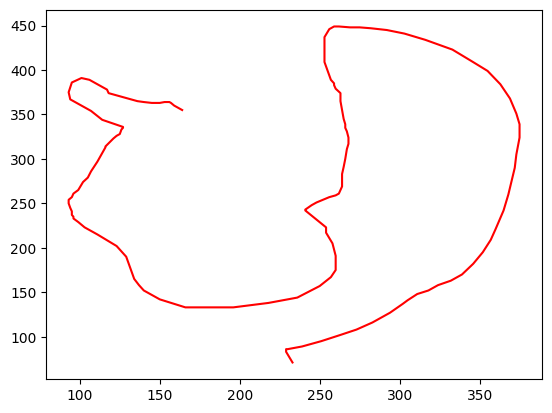

In [11]:
plt.plot(actions[:,0], actions[:,1], c='r')

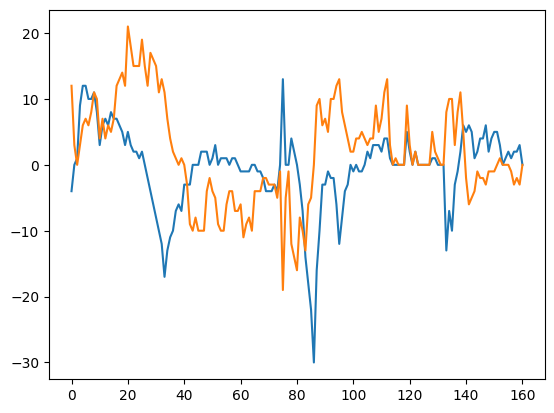

In [12]:
plt.plot(dactions)

In [ ]:
dirname="pusht_videos"
savepath = os.path.join("videos", dirname)
os.makedirs(savepath, exist_ok=True)

 
for i, demo_name in enumerate(demos):
    print(f"processing {demo_name} {i+1}/{len(demos)}")
    demo=f['data'][demo_name]
    images=demo['obs']['images'] 
    images=np.array(images)

    video_writer = imageio.get_writer(f"{savepath}/{demo_name}.mp4", fps=20)
    for image in images:
        video_writer.append_data(image[::-1])
    video_writer.close()

f.close()

In [14]:
f.close()